In [1]:
#data sets
import requests
from bs4 import BeautifulSoup
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

brand = []
capacity = []
size = []
am = []
price = []
usage = []
warranty_compressor = []
warranty_product = []
discount = []
rating = []
star = []


# web site
for i in range(1,25):
    url = "https://www.flipkart.com/search?q=air+conditioners&sid=j9e%2Cabm%2Cc54&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_8_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_8_na_na_na&as-pos=1&as-type=RECENT&suggestionId=air+conditioners%7CAir+Conditioners&requestId=e97c71df-0290-41eb-994c-5f62f8b114cf&as-backfill=on"+str(i)
    #print(url)
    page = requests.get(url)
    soup = BeautifulSoup(page.text)
    
    # extracting details
    bbbb = soup.find_all("div",class_="_4rR01T") # for brand, room size & capacity
    p = soup.find_all("div",class_="_30jeq3 _1_WHN1") # for prices
    cccc = soup.find_all("li",class_="rgWa7D") # for warranty of product,compressor and star
    d2 = soup.find_all("div",class_="_3I9_wc _27UcVY") # before discount
    dis2 = soup.find_all("div",class_ = "_3pLy-c row") #given discount
    rat = soup.find_all("div",class_ = "_3pLy-c row") # for rating
    #sss = list(soup.find_all("li",class_="rgWa7D")) #



    # brand
    for i in bbbb:
        brand.append(i.text.split()[0])


    #price
    for i in p:
        price.append(i.text.split()[0])

    #amount before discount
    for i in d2:
        a = i.text
        b = re.findall("₹(\d+,?\d+)",a)
        am.append(b[0])

    #usage
    for i in cccc:
        a = i.text
        c = re.findall(r"(\d+\.\d+)\skWh",a)
        b = re.findall("(\d+)\skWh",a)

        if len(c)>0:
            usage.append(c[0])

        elif len(b)>0:
            usage.append(b[0])

    #room size
    for i in cccc:
        a = i.text
        b = re.findall("(\d+)\ssqft",a)
        if len(b)>0:
            size.append(b[0])


    # AC star
    for i in bbbb:
        a = i.text
        b = re.findall("(\d)\sStar",a)
        if len(b)>0:
            star.append(b[0])

    #capacity
    for i in bbbb:
        a = i.text
        print(a)
        b = re.findall(r"(\d+\.?\d?)\sTon",a)
        if b:
            capacity.append(b[0])
        else:
            capacity.append(np.nan)  

    # warranty_compressor
    for i in cccc:
        a = i.text
        b = re.findall("and\s(\d+).*Compressor",a)
        c = re.findall("(\d+).*Inverter",a)
        d = re.findall("and\s(\d+).*compressor",a)
        e = re.findall(",\s(\d+).*Compressor",a)


        if len(b)>0:
            warranty_compressor.append(b[0])
        elif len(c)>0:
            warranty_compressor.append(c[0])
        elif len(d)>0:
            warranty_compressor.append(d[0])
        elif len(e)>0:
            warranty_compressor.append(e[0])



    # warranty_product
    for i in cccc:
        a = i.text
        b = re.findall("(\d)\s.*\sComprehensive",a)
        c = re.findall("(\d)\s.*\sProduct",a)
        d = re.findall("(\d)\s.*\scomprehensive",a)

        if len(b)>0:
            warranty_product.append(b[0])
        elif len(c)>0:
            warranty_product.append(c[0])
        elif len(d)>0:
            warranty_product.append(d[0])


    #discount
    for i in dis2:
        a = i.text
        
        b = re.findall("(\d\d)%",a)  

        if len(b)>0:
            discount.append(b[0])
        else:
            discount.append(np.nan)

    #rating
    for i in rat:
        a = i.find('div', class_='_3LWZlK')
        print(a)
        if a:
            rating.append(a.text)
        else:
            rating.append(np.nan)


LG AI Convertible 6-in-1 Cooling 2023 Model 1.5 Ton 3 Star Split Inverter 2 Way Swing, HD Filter with ...
Panasonic Convertible 7-in-1 with Additional AI Mode Cooling 2023 Model 1.5 Ton 3 Star Split Inverter ...
Godrej 5-In-1 Convertible Cooling 2023 Model 1.5 Ton 3 Star Split Inverter With Heavy Duty Cooling at ...
Voltas 2023 Model 1.5 Ton 5 Star Split Inverter AC  - White
Godrej 5-in-1 Convertible Cooling 2023 Model 1.5 Ton 4 Star Split Inverter with 4 Way Swing and Tri Fi...
SAMSUNG Convertible 5-in-1 Cooling 2023 Model 1.5 Ton 3 Star Split Inverter Wind Free AC  - White
Voltas 1.5 Ton 3 Star Split Inverter AC  - White
LG AI Convertible 6-in-1 Cooling 2023 Model 1.5 Ton 5 Star Split Inverter 4 Way Swing, HD Filter with ...
Godrej 5-in-1 Convertible Cooling 2023 Model 1 Ton 3 Star Split Inverter i-sense Technology with Blue ...
Whirlpool Convertible 4-in-1 Cooling 2023 Model 1.5 Ton 5 Star Split Inverter 6th Sense Technology AC ...
Blue Star 2023 Model 0.8 Ton 3 Star Split Inverter 

LG AI Convertible 6-in-1 Cooling 2023 Model 1.5 Ton 3 Star Split Inverter 2 Way Swing, HD Filter with ...
Panasonic Convertible 7-in-1 with Additional AI Mode Cooling 2023 Model 1.5 Ton 3 Star Split Inverter ...
Godrej 5-In-1 Convertible Cooling 2023 Model 1.5 Ton 3 Star Split Inverter With Heavy Duty Cooling at ...
Voltas 2023 Model 1.5 Ton 5 Star Split Inverter AC  - White
Godrej 5-in-1 Convertible Cooling 2023 Model 1.5 Ton 4 Star Split Inverter with 4 Way Swing and Tri Fi...
SAMSUNG Convertible 5-in-1 Cooling 2023 Model 1.5 Ton 3 Star Split Inverter Wind Free AC  - White
Voltas 1.5 Ton 3 Star Split Inverter AC  - White
LG AI Convertible 6-in-1 Cooling 2023 Model 1.5 Ton 5 Star Split Inverter 4 Way Swing, HD Filter with ...
Godrej 5-in-1 Convertible Cooling 2023 Model 1 Ton 3 Star Split Inverter i-sense Technology with Blue ...
Whirlpool Convertible 4-in-1 Cooling 2023 Model 1.5 Ton 5 Star Split Inverter 6th Sense Technology AC ...
Blue Star 2023 Model 0.8 Ton 3 Star Split Inverter 

LG AI Convertible 6-in-1 Cooling 2023 Model 1.5 Ton 3 Star Split Inverter 2 Way Swing, HD Filter with ...
Panasonic Convertible 7-in-1 with Additional AI Mode Cooling 2023 Model 1.5 Ton 3 Star Split Inverter ...
Godrej 5-In-1 Convertible Cooling 2023 Model 1.5 Ton 3 Star Split Inverter With Heavy Duty Cooling at ...
Voltas 2023 Model 1.5 Ton 5 Star Split Inverter AC  - White
Voltas 1.5 Ton 3 Star Split Inverter AC  - White
Godrej 5-in-1 Convertible Cooling 2023 Model 1.5 Ton 4 Star Split Inverter with 4 Way Swing and Tri Fi...
Whirlpool Convertible 4-in-1 Cooling 2023 Model 1.5 Ton 5 Star Split Inverter 6th Sense Technology AC ...
LG AI Convertible 6-in-1 Cooling 2023 Model 1.5 Ton 5 Star Split Inverter 4 Way Swing, HD Filter with ...
Godrej 5-in-1 Convertible Cooling 2023 Model 1 Ton 3 Star Split Inverter i-sense Technology with Blue ...
SAMSUNG Convertible 5-in-1 Cooling 2023 Model 1.5 Ton 3 Star Split Inverter Wind Free AC  - White
Blue Star 2023 Model 0.8 Ton 3 Star Split Inverter 

LG AI Convertible 6-in-1 Cooling 2023 Model 1.5 Ton 3 Star Split Inverter 2 Way Swing, HD Filter with ...
Panasonic Convertible 7-in-1 with Additional AI Mode Cooling 2023 Model 1.5 Ton 3 Star Split Inverter ...
Godrej 5-In-1 Convertible Cooling 2023 Model 1.5 Ton 3 Star Split Inverter With Heavy Duty Cooling at ...
Voltas 2023 Model 1.5 Ton 5 Star Split Inverter AC  - White
Voltas 1.5 Ton 3 Star Split Inverter AC  - White
Godrej 5-in-1 Convertible Cooling 2023 Model 1.5 Ton 4 Star Split Inverter with 4 Way Swing and Tri Fi...
Whirlpool Convertible 4-in-1 Cooling 2023 Model 1.5 Ton 5 Star Split Inverter 6th Sense Technology AC ...
LG AI Convertible 6-in-1 Cooling 2023 Model 1.5 Ton 5 Star Split Inverter 4 Way Swing, HD Filter with ...
Godrej 5-in-1 Convertible Cooling 2023 Model 1 Ton 3 Star Split Inverter i-sense Technology with Blue ...
SAMSUNG Convertible 5-in-1 Cooling 2023 Model 1.5 Ton 3 Star Split Inverter Wind Free AC  - White
Blue Star 2023 Model 0.8 Ton 3 Star Split Inverter 

LG AI Convertible 6-in-1 Cooling 2023 Model 1.5 Ton 3 Star Split Inverter 2 Way Swing, HD Filter with ...
Panasonic Convertible 7-in-1 with Additional AI Mode Cooling 2023 Model 1.5 Ton 3 Star Split Inverter ...
Godrej 5-In-1 Convertible Cooling 2023 Model 1.5 Ton 3 Star Split Inverter With Heavy Duty Cooling at ...
Voltas 2023 Model 1.5 Ton 5 Star Split Inverter AC  - White
Voltas 1.5 Ton 3 Star Split Inverter AC  - White
Godrej 5-in-1 Convertible Cooling 2023 Model 1.5 Ton 4 Star Split Inverter with 4 Way Swing and Tri Fi...
Whirlpool Convertible 4-in-1 Cooling 2023 Model 1.5 Ton 5 Star Split Inverter 6th Sense Technology AC ...
LG AI Convertible 6-in-1 Cooling 2023 Model 1.5 Ton 5 Star Split Inverter 4 Way Swing, HD Filter with ...
Godrej 5-in-1 Convertible Cooling 2023 Model 1 Ton 3 Star Split Inverter i-sense Technology with Blue ...
SAMSUNG Convertible 5-in-1 Cooling 2023 Model 1.5 Ton 3 Star Split Inverter Wind Free AC  - White
Blue Star 2023 Model 0.8 Ton 3 Star Split Inverter 

LG AI Convertible 6-in-1 Cooling 2023 Model 1.5 Ton 3 Star Split Inverter 2 Way Swing, HD Filter with ...
Panasonic Convertible 7-in-1 with Additional AI Mode Cooling 2023 Model 1.5 Ton 3 Star Split Inverter ...
Godrej 5-In-1 Convertible Cooling 2023 Model 1.5 Ton 3 Star Split Inverter With Heavy Duty Cooling at ...
Voltas 2023 Model 1.5 Ton 5 Star Split Inverter AC  - White
Voltas 1.5 Ton 3 Star Split Inverter AC  - White
Godrej 5-in-1 Convertible Cooling 2023 Model 1.5 Ton 4 Star Split Inverter with 4 Way Swing and Tri Fi...
Whirlpool Convertible 4-in-1 Cooling 2023 Model 1.5 Ton 5 Star Split Inverter 6th Sense Technology AC ...
LG AI Convertible 6-in-1 Cooling 2023 Model 1.5 Ton 5 Star Split Inverter 4 Way Swing, HD Filter with ...
Godrej 5-in-1 Convertible Cooling 2023 Model 1 Ton 3 Star Split Inverter i-sense Technology with Blue ...
SAMSUNG Convertible 5-in-1 Cooling 2023 Model 1.5 Ton 3 Star Split Inverter Wind Free AC  - White
Blue Star 2023 Model 0.8 Ton 3 Star Split Inverter 

LG AI Convertible 6-in-1 Cooling 2023 Model 1.5 Ton 3 Star Split Inverter 2 Way Swing, HD Filter with ...
Panasonic Convertible 7-in-1 with Additional AI Mode Cooling 2023 Model 1.5 Ton 3 Star Split Inverter ...
Godrej 5-In-1 Convertible Cooling 2023 Model 1.5 Ton 3 Star Split Inverter With Heavy Duty Cooling at ...
Voltas 2023 Model 1.5 Ton 5 Star Split Inverter AC  - White
Voltas 1.5 Ton 3 Star Split Inverter AC  - White
Godrej 5-in-1 Convertible Cooling 2023 Model 1.5 Ton 4 Star Split Inverter with 4 Way Swing and Tri Fi...
Whirlpool Convertible 4-in-1 Cooling 2023 Model 1.5 Ton 5 Star Split Inverter 6th Sense Technology AC ...
LG AI Convertible 6-in-1 Cooling 2023 Model 1.5 Ton 5 Star Split Inverter 4 Way Swing, HD Filter with ...
Godrej 5-in-1 Convertible Cooling 2023 Model 1 Ton 3 Star Split Inverter i-sense Technology with Blue ...
SAMSUNG Convertible 5-in-1 Cooling 2023 Model 1.5 Ton 3 Star Split Inverter Wind Free AC  - White
Blue Star 2023 Model 0.8 Ton 3 Star Split Inverter 

LG AI Convertible 6-in-1 Cooling 2023 Model 1.5 Ton 3 Star Split Inverter 2 Way Swing, HD Filter with ...
Panasonic Convertible 7-in-1 with Additional AI Mode Cooling 2023 Model 1.5 Ton 3 Star Split Inverter ...
Godrej 5-In-1 Convertible Cooling 2023 Model 1.5 Ton 3 Star Split Inverter With Heavy Duty Cooling at ...
Voltas 2023 Model 1.5 Ton 5 Star Split Inverter AC  - White
Voltas 1.5 Ton 3 Star Split Inverter AC  - White
Godrej 5-in-1 Convertible Cooling 2023 Model 1.5 Ton 4 Star Split Inverter with 4 Way Swing and Tri Fi...
Whirlpool Convertible 4-in-1 Cooling 2023 Model 1.5 Ton 5 Star Split Inverter 6th Sense Technology AC ...
LG AI Convertible 6-in-1 Cooling 2023 Model 1.5 Ton 5 Star Split Inverter 4 Way Swing, HD Filter with ...
Godrej 5-in-1 Convertible Cooling 2023 Model 1 Ton 3 Star Split Inverter i-sense Technology with Blue ...
SAMSUNG Convertible 5-in-1 Cooling 2023 Model 1.5 Ton 3 Star Split Inverter Wind Free AC  - White
Blue Star 2023 Model 0.8 Ton 3 Star Split Inverter 

LG AI Convertible 6-in-1 Cooling 2023 Model 1.5 Ton 3 Star Split Inverter 2 Way Swing, HD Filter with ...
Panasonic Convertible 7-in-1 with Additional AI Mode Cooling 2023 Model 1.5 Ton 3 Star Split Inverter ...
Godrej 5-In-1 Convertible Cooling 2023 Model 1.5 Ton 3 Star Split Inverter With Heavy Duty Cooling at ...
Voltas 2023 Model 1.5 Ton 5 Star Split Inverter AC  - White
Voltas 1.5 Ton 3 Star Split Inverter AC  - White
Godrej 5-in-1 Convertible Cooling 2023 Model 1.5 Ton 4 Star Split Inverter with 4 Way Swing and Tri Fi...
Whirlpool Convertible 4-in-1 Cooling 2023 Model 1.5 Ton 5 Star Split Inverter 6th Sense Technology AC ...
LG AI Convertible 6-in-1 Cooling 2023 Model 1.5 Ton 5 Star Split Inverter 4 Way Swing, HD Filter with ...
Godrej 5-in-1 Convertible Cooling 2023 Model 1 Ton 3 Star Split Inverter i-sense Technology with Blue ...
SAMSUNG Convertible 5-in-1 Cooling 2023 Model 1.5 Ton 3 Star Split Inverter Wind Free AC  - White
Blue Star 2023 Model 0.8 Ton 3 Star Split Inverter 

LG AI Convertible 6-in-1 Cooling 2023 Model 1.5 Ton 3 Star Split Inverter 2 Way Swing, HD Filter with ...
Panasonic Convertible 7-in-1 with Additional AI Mode Cooling 2023 Model 1.5 Ton 3 Star Split Inverter ...
Godrej 5-In-1 Convertible Cooling 2023 Model 1.5 Ton 3 Star Split Inverter With Heavy Duty Cooling at ...
Voltas 2023 Model 1.5 Ton 5 Star Split Inverter AC  - White
Godrej 5-in-1 Convertible Cooling 2023 Model 1.5 Ton 4 Star Split Inverter with 4 Way Swing and Tri Fi...
SAMSUNG Convertible 5-in-1 Cooling 2023 Model 1.5 Ton 3 Star Split Inverter Wind Free AC  - White
Voltas 1.5 Ton 3 Star Split Inverter AC  - White
LG AI Convertible 6-in-1 Cooling 2023 Model 1.5 Ton 5 Star Split Inverter 4 Way Swing, HD Filter with ...
Godrej 5-in-1 Convertible Cooling 2023 Model 1 Ton 3 Star Split Inverter i-sense Technology with Blue ...
Whirlpool Convertible 4-in-1 Cooling 2023 Model 1.5 Ton 5 Star Split Inverter 6th Sense Technology AC ...
Blue Star 2023 Model 0.8 Ton 3 Star Split Inverter 

LG AI Convertible 6-in-1 Cooling 2023 Model 1.5 Ton 3 Star Split Inverter 2 Way Swing, HD Filter with ...
Panasonic Convertible 7-in-1 with Additional AI Mode Cooling 2023 Model 1.5 Ton 3 Star Split Inverter ...
Godrej 5-In-1 Convertible Cooling 2023 Model 1.5 Ton 3 Star Split Inverter With Heavy Duty Cooling at ...
Voltas 2023 Model 1.5 Ton 5 Star Split Inverter AC  - White
Godrej 5-in-1 Convertible Cooling 2023 Model 1.5 Ton 4 Star Split Inverter with 4 Way Swing and Tri Fi...
SAMSUNG Convertible 5-in-1 Cooling 2023 Model 1.5 Ton 3 Star Split Inverter Wind Free AC  - White
Voltas 1.5 Ton 3 Star Split Inverter AC  - White
LG AI Convertible 6-in-1 Cooling 2023 Model 1.5 Ton 5 Star Split Inverter 4 Way Swing, HD Filter with ...
Godrej 5-in-1 Convertible Cooling 2023 Model 1 Ton 3 Star Split Inverter i-sense Technology with Blue ...
Whirlpool Convertible 4-in-1 Cooling 2023 Model 1.5 Ton 5 Star Split Inverter 6th Sense Technology AC ...
Blue Star 2023 Model 0.8 Ton 3 Star Split Inverter 

LG AI Convertible 6-in-1 Cooling 2023 Model 1.5 Ton 3 Star Split Inverter 2 Way Swing, HD Filter with ...
Panasonic Convertible 7-in-1 with Additional AI Mode Cooling 2023 Model 1.5 Ton 3 Star Split Inverter ...
Godrej 5-In-1 Convertible Cooling 2023 Model 1.5 Ton 3 Star Split Inverter With Heavy Duty Cooling at ...
Voltas 2023 Model 1.5 Ton 5 Star Split Inverter AC  - White
Voltas 1.5 Ton 3 Star Split Inverter AC  - White
Godrej 5-in-1 Convertible Cooling 2023 Model 1.5 Ton 4 Star Split Inverter with 4 Way Swing and Tri Fi...
Whirlpool Convertible 4-in-1 Cooling 2023 Model 1.5 Ton 5 Star Split Inverter 6th Sense Technology AC ...
LG AI Convertible 6-in-1 Cooling 2023 Model 1.5 Ton 5 Star Split Inverter 4 Way Swing, HD Filter with ...
Godrej 5-in-1 Convertible Cooling 2023 Model 1 Ton 3 Star Split Inverter i-sense Technology with Blue ...
SAMSUNG Convertible 5-in-1 Cooling 2023 Model 1.5 Ton 3 Star Split Inverter Wind Free AC  - White
Blue Star 2023 Model 0.8 Ton 3 Star Split Inverter 

LG AI Convertible 6-in-1 Cooling 2023 Model 1.5 Ton 3 Star Split Inverter 2 Way Swing, HD Filter with ...
Panasonic Convertible 7-in-1 with Additional AI Mode Cooling 2023 Model 1.5 Ton 3 Star Split Inverter ...
Godrej 5-In-1 Convertible Cooling 2023 Model 1.5 Ton 3 Star Split Inverter With Heavy Duty Cooling at ...
Voltas 2023 Model 1.5 Ton 5 Star Split Inverter AC  - White
Godrej 5-in-1 Convertible Cooling 2023 Model 1.5 Ton 4 Star Split Inverter with 4 Way Swing and Tri Fi...
SAMSUNG Convertible 5-in-1 Cooling 2023 Model 1.5 Ton 3 Star Split Inverter Wind Free AC  - White
Voltas 1.5 Ton 3 Star Split Inverter AC  - White
LG AI Convertible 6-in-1 Cooling 2023 Model 1.5 Ton 5 Star Split Inverter 4 Way Swing, HD Filter with ...
Godrej 5-in-1 Convertible Cooling 2023 Model 1 Ton 3 Star Split Inverter i-sense Technology with Blue ...
Whirlpool Convertible 4-in-1 Cooling 2023 Model 1.5 Ton 5 Star Split Inverter 6th Sense Technology AC ...
Blue Star 2023 Model 0.8 Ton 3 Star Split Inverter 

LG AI Convertible 6-in-1 Cooling 2023 Model 1.5 Ton 3 Star Split Inverter 2 Way Swing, HD Filter with ...
Panasonic Convertible 7-in-1 with Additional AI Mode Cooling 2023 Model 1.5 Ton 3 Star Split Inverter ...
Godrej 5-In-1 Convertible Cooling 2023 Model 1.5 Ton 3 Star Split Inverter With Heavy Duty Cooling at ...
Voltas 2023 Model 1.5 Ton 5 Star Split Inverter AC  - White
Godrej 5-in-1 Convertible Cooling 2023 Model 1.5 Ton 4 Star Split Inverter with 4 Way Swing and Tri Fi...
SAMSUNG Convertible 5-in-1 Cooling 2023 Model 1.5 Ton 3 Star Split Inverter Wind Free AC  - White
Voltas 1.5 Ton 3 Star Split Inverter AC  - White
LG AI Convertible 6-in-1 Cooling 2023 Model 1.5 Ton 5 Star Split Inverter 4 Way Swing, HD Filter with ...
Godrej 5-in-1 Convertible Cooling 2023 Model 1 Ton 3 Star Split Inverter i-sense Technology with Blue ...
Whirlpool Convertible 4-in-1 Cooling 2023 Model 1.5 Ton 5 Star Split Inverter 6th Sense Technology AC ...
Blue Star 2023 Model 0.8 Ton 3 Star Split Inverter 

LG AI Convertible 6-in-1 Cooling 2023 Model 1.5 Ton 3 Star Split Inverter 2 Way Swing, HD Filter with ...
Panasonic Convertible 7-in-1 with Additional AI Mode Cooling 2023 Model 1.5 Ton 3 Star Split Inverter ...
Godrej 5-In-1 Convertible Cooling 2023 Model 1.5 Ton 3 Star Split Inverter With Heavy Duty Cooling at ...
Voltas 2023 Model 1.5 Ton 5 Star Split Inverter AC  - White
Voltas 1.5 Ton 3 Star Split Inverter AC  - White
Godrej 5-in-1 Convertible Cooling 2023 Model 1.5 Ton 4 Star Split Inverter with 4 Way Swing and Tri Fi...
Whirlpool Convertible 4-in-1 Cooling 2023 Model 1.5 Ton 5 Star Split Inverter 6th Sense Technology AC ...
LG AI Convertible 6-in-1 Cooling 2023 Model 1.5 Ton 5 Star Split Inverter 4 Way Swing, HD Filter with ...
Godrej 5-in-1 Convertible Cooling 2023 Model 1 Ton 3 Star Split Inverter i-sense Technology with Blue ...
SAMSUNG Convertible 5-in-1 Cooling 2023 Model 1.5 Ton 3 Star Split Inverter Wind Free AC  - White
Blue Star 2023 Model 0.8 Ton 3 Star Split Inverter 

LG AI Convertible 6-in-1 Cooling 2023 Model 1.5 Ton 3 Star Split Inverter 2 Way Swing, HD Filter with ...
LG AI Convertible 6-in-1 Cooling 2023 Model 1.5 Ton 5 Star Split Inverter 4 Way Swing, HD Filter with ...
Godrej 5-In-1 Convertible Cooling 2023 Model 1.5 Ton 3 Star Split Inverter With Heavy Duty Cooling at ...
Voltas 2023 Model 1.5 Ton 5 Star Split Inverter AC  - White
Godrej 5-in-1 Convertible Cooling 2023 Model 1.5 Ton 4 Star Split Inverter with 4 Way Swing and Tri Fi...
SAMSUNG Convertible 5-in-1 Cooling 2023 Model 1.5 Ton 3 Star Split Inverter Wind Free AC  - White
Voltas 1.5 Ton 3 Star Split Inverter AC  - White
Blue Star 2023 Model 0.8 Ton 3 Star Split Inverter Multi Sensors, Self Clean Technology, Self Diagnosi...
Godrej 5-in-1 Convertible Cooling 2023 Model 1 Ton 3 Star Split Inverter i-sense Technology with Blue ...
Whirlpool Convertible 4-in-1 Cooling 2023 Model 1.5 Ton 5 Star Split Inverter 6th Sense Technology AC ...
Blue Star 2023 Model 1.5 Ton 3 Star Split Inverter 

LG AI Convertible 6-in-1 Cooling 2023 Model 1.5 Ton 3 Star Split Inverter 2 Way Swing, HD Filter with ...
Panasonic Convertible 7-in-1 with Additional AI Mode Cooling 2023 Model 1.5 Ton 3 Star Split Inverter ...
Godrej 5-In-1 Convertible Cooling 2023 Model 1.5 Ton 3 Star Split Inverter With Heavy Duty Cooling at ...
Voltas 2023 Model 1.5 Ton 5 Star Split Inverter AC  - White
Voltas 1.5 Ton 3 Star Split Inverter AC  - White
Godrej 5-in-1 Convertible Cooling 2023 Model 1.5 Ton 4 Star Split Inverter with 4 Way Swing and Tri Fi...
Whirlpool Convertible 4-in-1 Cooling 2023 Model 1.5 Ton 5 Star Split Inverter 6th Sense Technology AC ...
LG AI Convertible 6-in-1 Cooling 2023 Model 1.5 Ton 5 Star Split Inverter 4 Way Swing, HD Filter with ...
Godrej 5-in-1 Convertible Cooling 2023 Model 1 Ton 3 Star Split Inverter i-sense Technology with Blue ...
SAMSUNG Convertible 5-in-1 Cooling 2023 Model 1.5 Ton 3 Star Split Inverter Wind Free AC  - White
Blue Star 2023 Model 0.8 Ton 3 Star Split Inverter 

LG AI Convertible 6-in-1 Cooling 2023 Model 1.5 Ton 3 Star Split Inverter 2 Way Swing, HD Filter with ...
Panasonic Convertible 7-in-1 with Additional AI Mode Cooling 2023 Model 1.5 Ton 3 Star Split Inverter ...
Godrej 5-In-1 Convertible Cooling 2023 Model 1.5 Ton 3 Star Split Inverter With Heavy Duty Cooling at ...
Voltas 2023 Model 1.5 Ton 5 Star Split Inverter AC  - White
Voltas 1.5 Ton 3 Star Split Inverter AC  - White
Godrej 5-in-1 Convertible Cooling 2023 Model 1.5 Ton 4 Star Split Inverter with 4 Way Swing and Tri Fi...
Whirlpool Convertible 4-in-1 Cooling 2023 Model 1.5 Ton 5 Star Split Inverter 6th Sense Technology AC ...
LG AI Convertible 6-in-1 Cooling 2023 Model 1.5 Ton 5 Star Split Inverter 4 Way Swing, HD Filter with ...
Godrej 5-in-1 Convertible Cooling 2023 Model 1 Ton 3 Star Split Inverter i-sense Technology with Blue ...
SAMSUNG Convertible 5-in-1 Cooling 2023 Model 1.5 Ton 3 Star Split Inverter Wind Free AC  - White
Blue Star 2023 Model 0.8 Ton 3 Star Split Inverter 

LG AI Convertible 6-in-1 Cooling 2023 Model 1.5 Ton 3 Star Split Inverter 2 Way Swing, HD Filter with ...
Panasonic Convertible 7-in-1 with Additional AI Mode Cooling 2023 Model 1.5 Ton 3 Star Split Inverter ...
Godrej 5-In-1 Convertible Cooling 2023 Model 1.5 Ton 3 Star Split Inverter With Heavy Duty Cooling at ...
Voltas 2023 Model 1.5 Ton 5 Star Split Inverter AC  - White
Voltas 1.5 Ton 3 Star Split Inverter AC  - White
Godrej 5-in-1 Convertible Cooling 2023 Model 1.5 Ton 4 Star Split Inverter with 4 Way Swing and Tri Fi...
Whirlpool Convertible 4-in-1 Cooling 2023 Model 1.5 Ton 5 Star Split Inverter 6th Sense Technology AC ...
LG AI Convertible 6-in-1 Cooling 2023 Model 1.5 Ton 5 Star Split Inverter 4 Way Swing, HD Filter with ...
Godrej 5-in-1 Convertible Cooling 2023 Model 1 Ton 3 Star Split Inverter i-sense Technology with Blue ...
SAMSUNG Convertible 5-in-1 Cooling 2023 Model 1.5 Ton 3 Star Split Inverter Wind Free AC  - White
Blue Star 2023 Model 0.8 Ton 3 Star Split Inverter 

LG AI Convertible 6-in-1 Cooling 2023 Model 1.5 Ton 3 Star Split Inverter 2 Way Swing, HD Filter with ...
Panasonic Convertible 7-in-1 with Additional AI Mode Cooling 2023 Model 1.5 Ton 3 Star Split Inverter ...
Godrej 5-In-1 Convertible Cooling 2023 Model 1.5 Ton 3 Star Split Inverter With Heavy Duty Cooling at ...
Voltas 2023 Model 1.5 Ton 5 Star Split Inverter AC  - White
Voltas 1.5 Ton 3 Star Split Inverter AC  - White
Godrej 5-in-1 Convertible Cooling 2023 Model 1.5 Ton 4 Star Split Inverter with 4 Way Swing and Tri Fi...
Whirlpool Convertible 4-in-1 Cooling 2023 Model 1.5 Ton 5 Star Split Inverter 6th Sense Technology AC ...
LG AI Convertible 6-in-1 Cooling 2023 Model 1.5 Ton 5 Star Split Inverter 4 Way Swing, HD Filter with ...
Godrej 5-in-1 Convertible Cooling 2023 Model 1 Ton 3 Star Split Inverter i-sense Technology with Blue ...
SAMSUNG Convertible 5-in-1 Cooling 2023 Model 1.5 Ton 3 Star Split Inverter Wind Free AC  - White
Blue Star 2023 Model 0.8 Ton 3 Star Split Inverter 

LG AI Convertible 6-in-1 Cooling 2023 Model 1.5 Ton 3 Star Split Inverter 2 Way Swing, HD Filter with ...
Panasonic Convertible 7-in-1 with Additional AI Mode Cooling 2023 Model 1.5 Ton 3 Star Split Inverter ...
Godrej 5-In-1 Convertible Cooling 2023 Model 1.5 Ton 3 Star Split Inverter With Heavy Duty Cooling at ...
Voltas 2023 Model 1.5 Ton 5 Star Split Inverter AC  - White
Voltas 1.5 Ton 3 Star Split Inverter AC  - White
Godrej 5-in-1 Convertible Cooling 2023 Model 1.5 Ton 4 Star Split Inverter with 4 Way Swing and Tri Fi...
Whirlpool Convertible 4-in-1 Cooling 2023 Model 1.5 Ton 5 Star Split Inverter 6th Sense Technology AC ...
LG AI Convertible 6-in-1 Cooling 2023 Model 1.5 Ton 5 Star Split Inverter 4 Way Swing, HD Filter with ...
Godrej 5-in-1 Convertible Cooling 2023 Model 1 Ton 3 Star Split Inverter i-sense Technology with Blue ...
SAMSUNG Convertible 5-in-1 Cooling 2023 Model 1.5 Ton 3 Star Split Inverter Wind Free AC  - White
Blue Star 2023 Model 0.8 Ton 3 Star Split Inverter 

LG AI Convertible 6-in-1 Cooling 2023 Model 1.5 Ton 3 Star Split Inverter 2 Way Swing, HD Filter with ...
Panasonic Convertible 7-in-1 with Additional AI Mode Cooling 2023 Model 1.5 Ton 3 Star Split Inverter ...
Godrej 5-In-1 Convertible Cooling 2023 Model 1.5 Ton 3 Star Split Inverter With Heavy Duty Cooling at ...
Voltas 2023 Model 1.5 Ton 5 Star Split Inverter AC  - White
Voltas 1.5 Ton 3 Star Split Inverter AC  - White
Godrej 5-in-1 Convertible Cooling 2023 Model 1.5 Ton 4 Star Split Inverter with 4 Way Swing and Tri Fi...
Whirlpool Convertible 4-in-1 Cooling 2023 Model 1.5 Ton 5 Star Split Inverter 6th Sense Technology AC ...
LG AI Convertible 6-in-1 Cooling 2023 Model 1.5 Ton 5 Star Split Inverter 4 Way Swing, HD Filter with ...
Godrej 5-in-1 Convertible Cooling 2023 Model 1 Ton 3 Star Split Inverter i-sense Technology with Blue ...
SAMSUNG Convertible 5-in-1 Cooling 2023 Model 1.5 Ton 3 Star Split Inverter Wind Free AC  - White
Blue Star 2023 Model 0.8 Ton 3 Star Split Inverter 

LG AI Convertible 6-in-1 Cooling 2023 Model 1.5 Ton 3 Star Split Inverter 2 Way Swing, HD Filter with ...
Panasonic Convertible 7-in-1 with Additional AI Mode Cooling 2023 Model 1.5 Ton 3 Star Split Inverter ...
Godrej 5-In-1 Convertible Cooling 2023 Model 1.5 Ton 3 Star Split Inverter With Heavy Duty Cooling at ...
Voltas 2023 Model 1.5 Ton 5 Star Split Inverter AC  - White
Voltas 1.5 Ton 3 Star Split Inverter AC  - White
Godrej 5-in-1 Convertible Cooling 2023 Model 1.5 Ton 4 Star Split Inverter with 4 Way Swing and Tri Fi...
Whirlpool Convertible 4-in-1 Cooling 2023 Model 1.5 Ton 5 Star Split Inverter 6th Sense Technology AC ...
LG AI Convertible 6-in-1 Cooling 2023 Model 1.5 Ton 5 Star Split Inverter 4 Way Swing, HD Filter with ...
Godrej 5-in-1 Convertible Cooling 2023 Model 1 Ton 3 Star Split Inverter i-sense Technology with Blue ...
SAMSUNG Convertible 5-in-1 Cooling 2023 Model 1.5 Ton 3 Star Split Inverter Wind Free AC  - White
Blue Star 2023 Model 0.8 Ton 3 Star Split Inverter 

LG AI Convertible 6-in-1 Cooling 2023 Model 1.5 Ton 3 Star Split Inverter 2 Way Swing, HD Filter with ...
Panasonic Convertible 7-in-1 with Additional AI Mode Cooling 2023 Model 1.5 Ton 3 Star Split Inverter ...
Godrej 5-In-1 Convertible Cooling 2023 Model 1.5 Ton 3 Star Split Inverter With Heavy Duty Cooling at ...
Voltas 2023 Model 1.5 Ton 5 Star Split Inverter AC  - White
Voltas 1.5 Ton 3 Star Split Inverter AC  - White
Godrej 5-in-1 Convertible Cooling 2023 Model 1.5 Ton 4 Star Split Inverter with 4 Way Swing and Tri Fi...
Whirlpool Convertible 4-in-1 Cooling 2023 Model 1.5 Ton 5 Star Split Inverter 6th Sense Technology AC ...
LG AI Convertible 6-in-1 Cooling 2023 Model 1.5 Ton 5 Star Split Inverter 4 Way Swing, HD Filter with ...
Godrej 5-in-1 Convertible Cooling 2023 Model 1 Ton 3 Star Split Inverter i-sense Technology with Blue ...
SAMSUNG Convertible 5-in-1 Cooling 2023 Model 1.5 Ton 3 Star Split Inverter Wind Free AC  - White
Blue Star 2023 Model 0.8 Ton 3 Star Split Inverter 

In [2]:
len(rating)

576

In [3]:
len(price)

576

In [4]:
len(brand)

576

In [5]:
len(discount)

576

In [6]:
len(warranty_product)

576

In [7]:
len(warranty_compressor)

576

In [8]:
len(star)

576

In [9]:
len(usage)

576

In [10]:
len(am)

576

In [11]:
len(capacity)

576

In [12]:
len(size)

576

In [13]:
table1 = {"Brand" : brand,
     "Price" : price,
     "Available_Discount" :discount,
     "Rating" : rating,
     "Actual_Price" : am,
     "Annual_Consumption":usage,
     "Room_Size":size,
     "Star_Split":star,
     "Volume" : capacity,
     "Warranty_Compressor" : warranty_compressor,
     "Warranty_Product":warranty_product,
    }

df = pd.DataFrame(table1)

In [14]:
df

,Brand,Price,Available_Discount,Rating,Actual_Price,Annual_Consumption,Room_Size,Star_Split,Volume,Warranty_Compressor,Warranty_Product
0,LG,"₹35,990",47,4.2,"68,990",968.04,150,3,1.5,10,1
1,Panasonic,"₹36,490",34,4.3,"55,400",1002.72,150,3,1.5,10,1
2,Godrej,"₹30,990",31,4.1,"45,400",965.71,150,3,1.5,10,1
3,Voltas,"₹38,990",48,4.1,"75,990",751.28,150,5,1.5,10,1
4,Godrej,"₹32,990",34,4.1,"49,990",883.14,150,4,1.5,10,0
...,...,...,...,...,...,...,...,...,...,...,...
571,Whirlpool,"₹31,490",49,4,"62,000",963.21,150,3,1.5,5,1
572,Blue,"₹35,990",41,4.2,"61,250",1006.84,150,3,1.5,10,1
573,IFB,"₹36,999",26,4.2,"50,490",1005.73,150,3,1.5,10,1
574,Blue,"₹35,990",42,4.1,"62,250",1002.84,150,3,1.5,10,1


In [15]:
df.dtypes


Brand                  object
Price                  object
Available_Discount     object
Rating                 object
Actual_Price           object
Annual_Consumption     object
Room_Size              object
Star_Split             object
Volume                 object
Warranty_Compressor    object
Warranty_Product       object
dtype: object

In [16]:
df.to_csv('EDA1.csv')

In [17]:
pd.read_csv("EDA1.csv")

,Unnamed: 0,Brand,Price,Available_Discount,Rating,Actual_Price,Annual_Consumption,Room_Size,Star_Split,Volume,Warranty_Compressor,Warranty_Product
0,0,LG,"₹35,990",47,4.2,"68,990",968.04,150,3,1.5,10,1
1,1,Panasonic,"₹36,490",34,4.3,"55,400",1002.72,150,3,1.5,10,1
2,2,Godrej,"₹30,990",31,4.1,"45,400",965.71,150,3,1.5,10,1
3,3,Voltas,"₹38,990",48,4.1,"75,990",751.28,150,5,1.5,10,1
4,4,Godrej,"₹32,990",34,4.1,"49,990",883.14,150,4,1.5,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,571,Whirlpool,"₹31,490",49,4.0,"62,000",963.21,150,3,1.5,5,1
572,572,Blue,"₹35,990",41,4.2,"61,250",1006.84,150,3,1.5,10,1
573,573,IFB,"₹36,999",26,4.2,"50,490",1005.73,150,3,1.5,10,1
574,574,Blue,"₹35,990",42,4.1,"62,250",1002.84,150,3,1.5,10,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Brand                576 non-null    object
 1   Price                576 non-null    object
 2   Available_Discount   576 non-null    object
 3   Rating               576 non-null    object
 4   Actual_Price         576 non-null    object
 5   Annual_Consumption   576 non-null    object
 6   Room_Size            576 non-null    object
 7   Star_Split           576 non-null    object
 8   Volume               576 non-null    object
 9   Warranty_Compressor  576 non-null    object
 10  Warranty_Product     576 non-null    object
dtypes: object(11)
memory usage: 49.6+ KB


In [19]:
print(df.columns)

Index(['Brand', 'Price', 'Available_Discount', 'Rating', 'Actual_Price',
       'Annual_Consumption', 'Room_Size', 'Star_Split', 'Volume',
       'Warranty_Compressor', 'Warranty_Product'],
      dtype='object')


## Cleaning 

In [21]:
pd.read_csv("csvds.csv")

SyntaxError: invalid syntax (1610870617.py, line 1)

In [22]:
# for price
a1 = price
a2 = [price for price in a1]
a3 = [int(price.replace('₹', '').replace(',', '')) for price in a2]

In [23]:
# for price before discount
b1 = am
b2 = [am for am in b1]
b3 = [int(am.replace('₹', '').replace(',', '')) for am in b2]

In [25]:
df

,Brand,Price,Available_Discount,Rating,Actual_Price,Annual_Consumption,Room_Size,Star_Split,Volume,Warranty_Compressor,Warranty_Product
0,LG,"₹35,990",47,4.2,"68,990",968.04,150,3,1.5,10,1
1,Panasonic,"₹36,490",34,4.3,"55,400",1002.72,150,3,1.5,10,1
2,Godrej,"₹30,990",31,4.1,"45,400",965.71,150,3,1.5,10,1
3,Voltas,"₹38,990",48,4.1,"75,990",751.28,150,5,1.5,10,1
4,Godrej,"₹32,990",34,4.1,"49,990",883.14,150,4,1.5,10,0
...,...,...,...,...,...,...,...,...,...,...,...
571,Whirlpool,"₹31,490",49,4,"62,000",963.21,150,3,1.5,5,1
572,Blue,"₹35,990",41,4.2,"61,250",1006.84,150,3,1.5,10,1
573,IFB,"₹36,999",26,4.2,"50,490",1005.73,150,3,1.5,10,1
574,Blue,"₹35,990",42,4.1,"62,250",1002.84,150,3,1.5,10,1


In [26]:
final_table = {"Brand" : brand,
     "Price" : a3,
     "Available_Discount%" :discount,
     "Rating" : rating,
     "Actual_Price" : b3,
     "Anual_Consumption(in kWh)":usage,
     "Room_Size(in sqft)":size,
     "Star_Rating":star,
     "Volume(in Ton)" : capacity,
     "Warranty_Compressor" : warranty_compressor,
     "Warranty_Product":warranty_product,
    }

df1 = pd.DataFrame(final_table)

In [27]:
df1['Brand']=df1['Brand'].str.replace('Blue', 'Blue Star')

In [28]:
df1.isnull().sum()

Brand                        0
Price                        0
Available_Discount%          0
Rating                       0
Actual_Price                 0
Anual_Consumption(in kWh)    0
Room_Size(in sqft)           0
Star_Rating                  0
Volume(in Ton)               0
Warranty_Compressor          0
Warranty_Product             0
dtype: int64

In [29]:
df2 = df1.dropna()
df2.shape

(576, 11)

In [30]:
df1 = df1.dropna(axis=0)

In [31]:
df1.isnull().sum()

Brand                        0
Price                        0
Available_Discount%          0
Rating                       0
Actual_Price                 0
Anual_Consumption(in kWh)    0
Room_Size(in sqft)           0
Star_Rating                  0
Volume(in Ton)               0
Warranty_Compressor          0
Warranty_Product             0
dtype: int64

In [34]:
#df1 = df1.drop("Unnamed: 0", axis=1)

In [35]:
df1

,Brand,Price,Available_Discount%,Rating,Actual_Price,Anual_Consumption(in kWh),Room_Size(in sqft),Star_Rating,Volume(in Ton),Warranty_Compressor,Warranty_Product
0,LG,35990,47,4.2,68990,968.04,150,3,1.5,10,1
1,Panasonic,36490,34,4.3,55400,1002.72,150,3,1.5,10,1
2,Godrej,30990,31,4.1,45400,965.71,150,3,1.5,10,1
3,Voltas,38990,48,4.1,75990,751.28,150,5,1.5,10,1
4,Godrej,32990,34,4.1,49990,883.14,150,4,1.5,10,0
...,...,...,...,...,...,...,...,...,...,...,...
571,Whirlpool,31490,49,4,62000,963.21,150,3,1.5,5,1
572,Blue Star,35990,41,4.2,61250,1006.84,150,3,1.5,10,1
573,IFB,36999,26,4.2,50490,1005.73,150,3,1.5,10,1
574,Blue Star,35990,42,4.1,62250,1002.84,150,3,1.5,10,1


## Type-Casting

In [1328]:
df1['Available_Discount%']=df1['Available_Discount%'].astype("int")
df1["Rating"] = df1["Rating"].astype("float")
df1["Anual_Consumption(in kWh)"] = df1["Anual_Consumption(in kWh)"].astype("float")
df1["Volume(in Ton)"] = df1["Volume(in Ton)"].astype("float")
df1["Star_Rating"]=df1["Star_Rating"].astype("int")
df1["Room_Size(in sqft)"]=df1["Room_Size(in sqft)"].astype("int")
df1["Warranty_Compressor"]=df1["Warranty_Compressor"].astype("int")
df1["Warranty_Product"]=df1["Warranty_Product"].astype("int")

In [1329]:
df1.dtypes

Brand                         object
Price                          int64
Available_Discount%            int32
Rating                       float64
Actual_Price                   int64
Anual_Consumption(in kWh)    float64
Room_Size(in sqft)             int32
Star_Rating                    int32
Volume(in Ton)               float64
Warranty_Compressor            int32
Warranty_Product               int32
dtype: object

In [1330]:
df1.to_csv('Final_EDA.csv')

In [1331]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 538 entries, 0 to 551
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Brand                      538 non-null    object 
 1   Price                      538 non-null    int64  
 2   Available_Discount%        538 non-null    int32  
 3   Rating                     538 non-null    float64
 4   Actual_Price               538 non-null    int64  
 5   Anual_Consumption(in kWh)  538 non-null    float64
 6   Room_Size(in sqft)         538 non-null    int32  
 7   Star_Rating                538 non-null    int32  
 8   Volume(in Ton)             538 non-null    float64
 9   Warranty_Compressor        538 non-null    int32  
 10  Warranty_Product           538 non-null    int32  
dtypes: float64(3), int32(5), int64(2), object(1)
memory usage: 39.9+ KB


In [1332]:
df1.isnull().sum()

Brand                        0
Price                        0
Available_Discount%          0
Rating                       0
Actual_Price                 0
Anual_Consumption(in kWh)    0
Room_Size(in sqft)           0
Star_Rating                  0
Volume(in Ton)               0
Warranty_Compressor          0
Warranty_Product             0
dtype: int64

In [1402]:
df1 = df1.drop(columns = "Unnamed: 0",axis=1)

In [1403]:
df1

,Brand,Price,Available_Discount%,Rating,Actual_Price,Anual_Consumption(in kWh),Room_Size(in sqft),Star_Rating,Volume(in Ton),Warranty_Compressor,Warranty_Product
0,Panasonic,36490,34,4.3,55400,1002.72,150,3,1.5,10,1
1,Godrej,32990,34,4.1,49990,883.14,150,4,1.5,10,0
2,Godrej,32490,28,4.1,45400,965.71,150,3,1.5,10,1
3,Voltas,32990,49,4.2,64990,975.26,150,3,1.5,10,1
4,Voltas,39490,48,4.1,75990,751.28,150,5,1.5,10,1
...,...,...,...,...,...,...,...,...,...,...,...
533,Whirlpool,33999,47,4.0,64200,515.27,90,5,1.0,5,1
534,CANDY,32990,45,4.0,61000,528.92,90,5,1.0,10,1
535,Blue Star,35990,42,4.1,62250,1002.84,150,3,1.5,10,1
536,Voltas,32990,47,4.2,62990,975.26,150,3,1.5,10,1


In [1334]:
df1.to_csv('FINAL_EDA.csv')

## Visualization

In [1378]:
pd.read_csv("FINAL_EDA.csv")

,Unnamed: 0,Brand,Price,Available_Discount%,Rating,Actual_Price,Anual_Consumption(in kWh),Room_Size(in sqft),Star_Rating,Volume(in Ton),Warranty_Compressor,Warranty_Product
0,0,Panasonic,36490,34,4.3,55400,1002.72,150,3,1.5,10,1
1,1,Godrej,32990,34,4.1,49990,883.14,150,4,1.5,10,0
2,2,Godrej,32490,28,4.1,45400,965.71,150,3,1.5,10,1
3,3,Voltas,32990,49,4.2,64990,975.26,150,3,1.5,10,1
4,4,Voltas,39490,48,4.1,75990,751.28,150,5,1.5,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...
533,547,Whirlpool,33999,47,4.0,64200,515.27,90,5,1.0,5,1
534,548,CANDY,32990,45,4.0,61000,528.92,90,5,1.0,10,1
535,549,Blue Star,35990,42,4.1,62250,1002.84,150,3,1.5,10,1
536,550,Voltas,32990,47,4.2,62990,975.26,150,3,1.5,10,1


In [1380]:
df1.columns


Index(['Brand', 'Price', 'Available_Discount%', 'Rating', 'Actual_Price',
       'Anual_Consumption(in kWh)', 'Room_Size(in sqft)', 'Star_Rating',
       'Volume(in Ton)', 'Warranty_Compressor', 'Warranty_Product'],
      dtype='object')

In [1523]:
df1 = pd.read_csv("FINAL_EDA.csv")


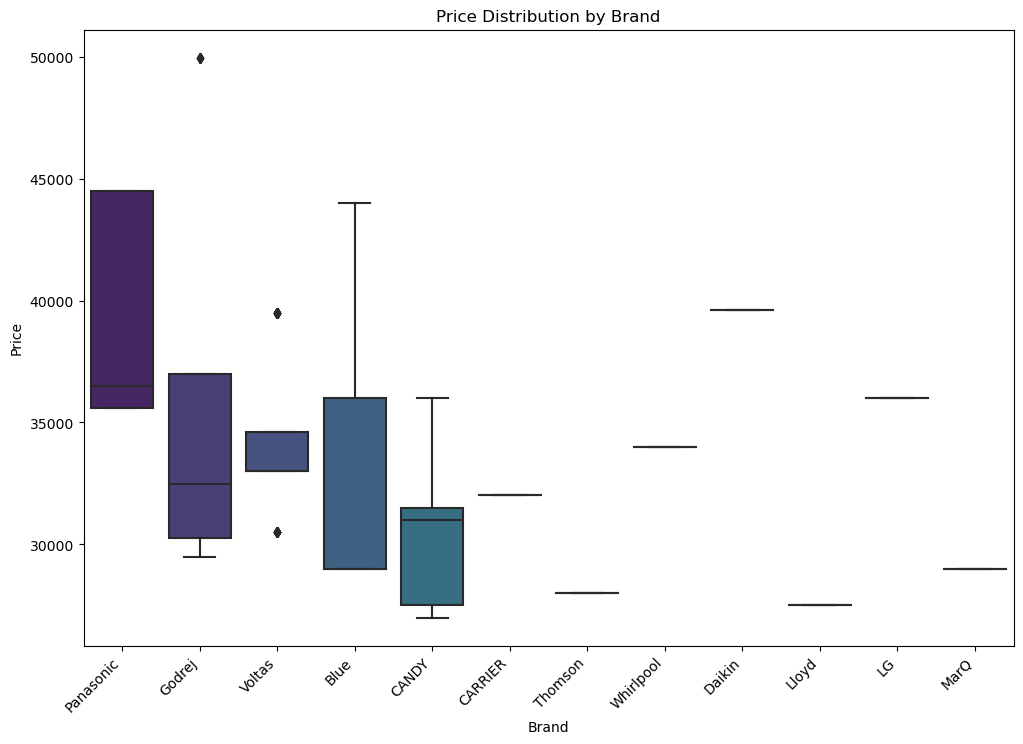

In [1532]:
# Brands and their Prices
plt.figure(figsize=(12, 8))
sns.boxplot(x='Brand', y='Price', data=df, palette='viridis')
plt.title('Price Distribution by Brand')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.show()

1) The boxplot illustrates the distribution of prices for different brands in the dataset.
2) Outliers are visible for Godrej & Voltas, indicating some products within this brand have significantly higher prices compared to the majority.
3) The overall spread of prices varies across different brands, highlighting potential market segmentation based on pricing strategies.

C:\Users\user\AppData\Local\Temp\ipykernel_22548\2285808202.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1.groupby('Brand')['Price','Actual_Price'].mean().plot.bar()


<Figure size 1100x1000 with 0 Axes>

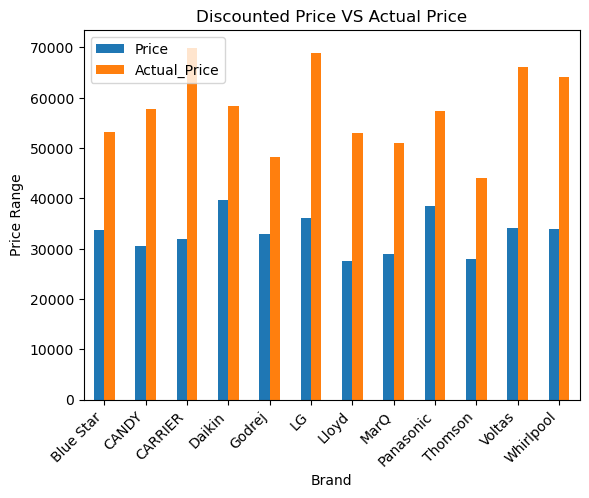

In [1585]:
#Difference between actual price & discounted price.
plt.figure(figsize=(11,10))
df1.groupby('Brand')['Price','Actual_Price'].mean().plot.bar()
plt.title("Discounted Price VS Actual Price")
plt.xlabel('Brand')
plt.ylabel('Price Range')
plt.xticks(rotation=45, ha='right')

plt.show()

1) The bar plot illustrates the mean discounted price and actual price for each brand in the dataset.
2) Carrier has the highest mean discounted price, suggesting that it often offers higher discounts or has products with higher original prices.
3) This visualization helps in comparing the overall pricing structure and discounting patterns across various brands.

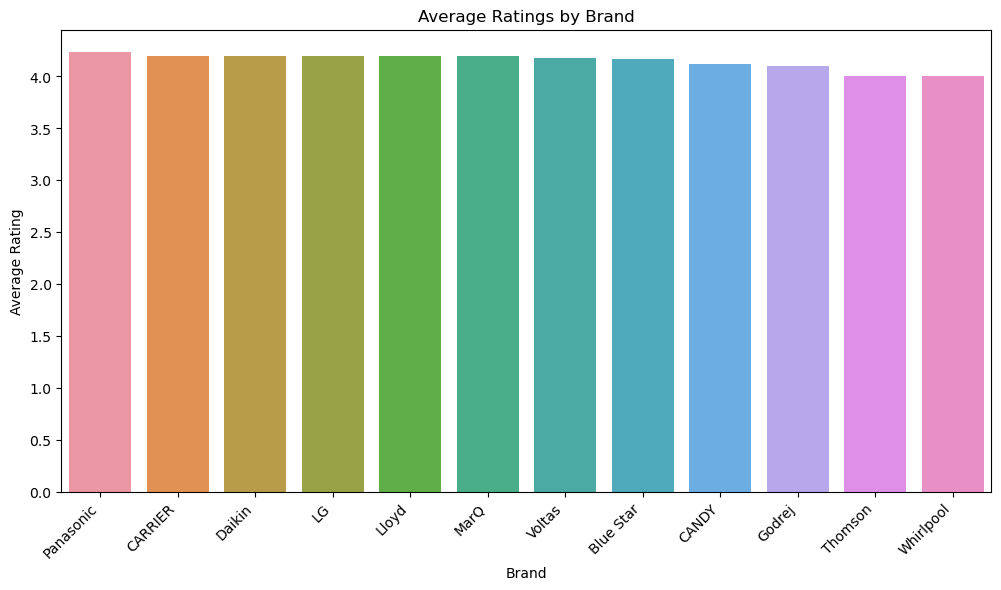

In [1566]:
# brand and rating

brand_avg_rating = df1.groupby('Brand')['Rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=brand_avg_rating.index, y=brand_avg_rating.values)
plt.title('Average Ratings by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

1) The bar graph provides an overview of the average ratings for different air conditioner brands.
2) Consumers can quickly identify which brands, on average, receive higher ratings based on user reviews.

<Axes: xlabel='Brand', ylabel='Available_Discount%'>

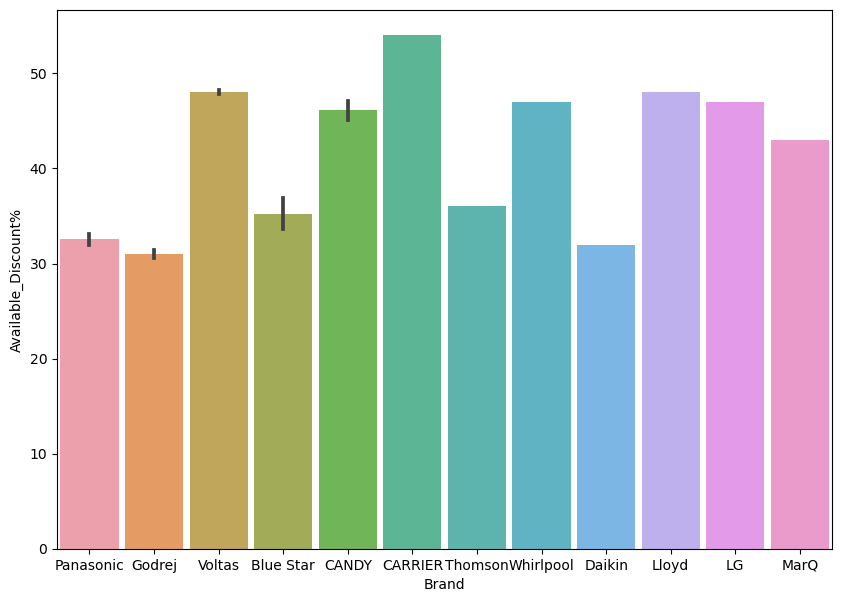

In [1384]:
# which companies are giving higher discounts?
plt.figure(figsize=(10,7))
sns.barplot(x = 'Brand',y = 'Available_Discount%', data = df1 , alpha = 0.9, width = 0.9)

1) The bar plot visualizes the average available discount percentage for each brand in the dataset.
2) Carrier, LG and showcase the highest average available discount percentages, indicating a more aggressive discounting strategy.

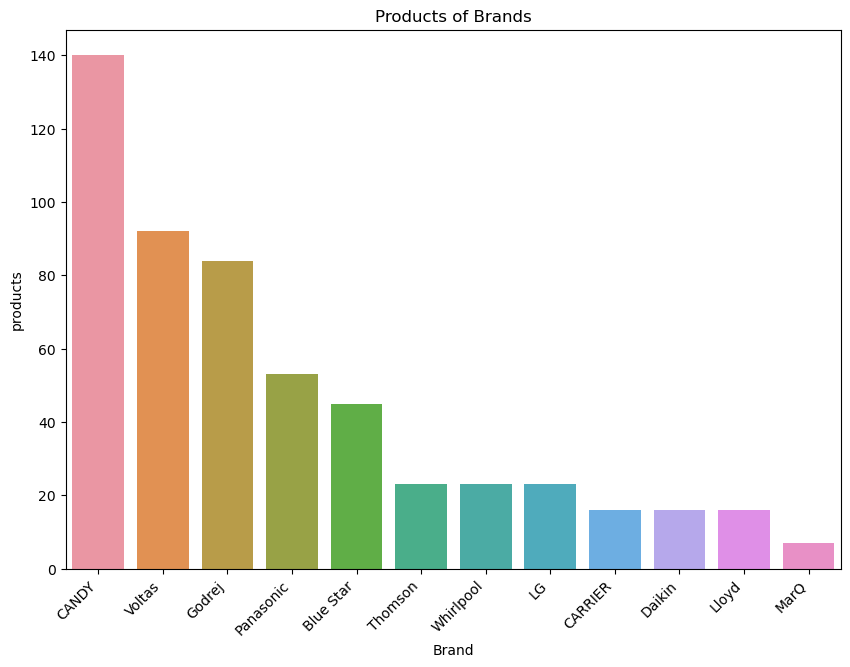

In [1571]:
#which company have more Products
plt.figure(figsize=(10,7))
brand_counts = df1['Brand'].value_counts()
sns.barplot(x=brand_counts.index, y=brand_counts)
plt.title('Products of Brands')
plt.xlabel('Brand')
plt.ylabel('products')
plt.xticks(rotation=45, ha='right')
plt.show()


1) The bar plot visualizes the distribution of the number of products for each brand in the dataset.
2) Candy have the highest counts, indicating a larger variety product range compared to other brands.
3) Marq have the lowest counts, indicating a smaller variety product range compared to other brands.

C:\Users\user\AppData\Local\Temp\ipykernel_22548\3738362239.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Brand', y='Warranty_Compressor', data=df1, ci=None, label='Compressor Warranty', color='blue')
C:\Users\user\AppData\Local\Temp\ipykernel_22548\3738362239.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Brand', y='Warranty_Product', data=df1, ci=None, label='Product Warranty', color='orange')


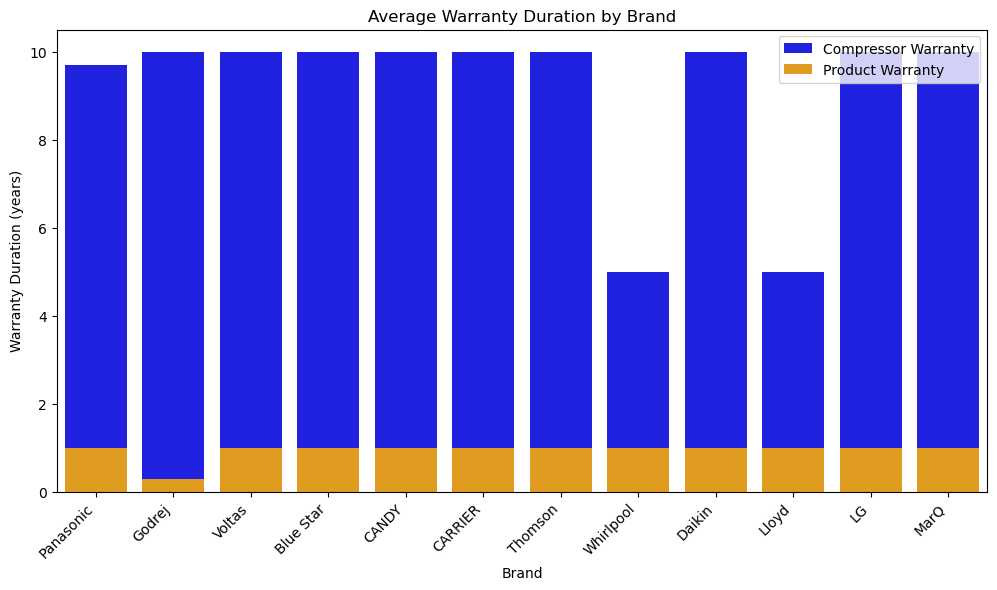

In [1526]:
# warranty compressor and warranty product
plt.figure(figsize=(12, 6))

sns.barplot(x='Brand', y='Warranty_Compressor', data=df1, ci=None, label='Compressor Warranty', color='blue')
sns.barplot(x='Brand', y='Warranty_Product', data=df1, ci=None, label='Product Warranty', color='orange')

plt.title('Average Warranty Duration by Brand')
plt.xlabel('Brand')
plt.ylabel('Warranty Duration (years)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()


1) The bar plot illustrates the average duration of compressor and product warranties for each brand in the dataset.
2) Understanding the warranty durations is crucial for consumers assessing the long-term reliability.
3) This visualization can assist in benchmarking brands based on their warranty offerings and identifying potential areas for improvement.

C:\Users\user\AppData\Local\Temp\ipykernel_22548\424645186.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(y='Room_Size(in sqft)', x='Volume(in Ton)', data=df1, ci=None, palette='viridis', estimator='mean')


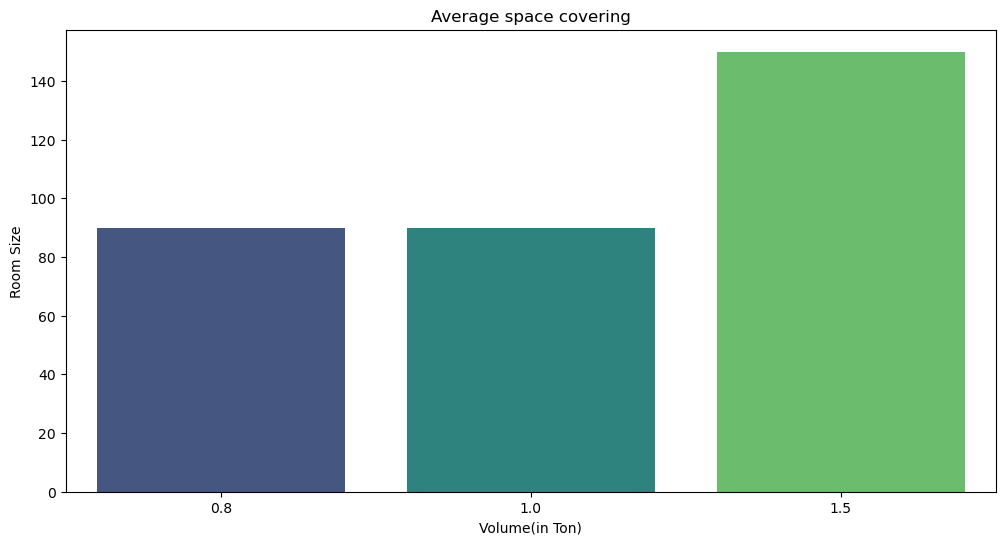

In [1538]:
# tons covering Room area and Annual Consumption
plt.figure(figsize=(12, 6))
sns.barplot(y='Room_Size(in sqft)', x='Volume(in Ton)', data=df1, ci=None, palette='viridis', estimator='mean')
plt.title('Average space covering')
plt.xlabel('Volume(in Ton)')
plt.ylabel('Room Size')
plt.show()

1) The bar plot visualizes the average room size (in square feet) covered by air conditioners with varying volumes (in tons).
2) Air conditioners with higher volumes tend to cover larger room sizes on average, indicating a positive correlation between volume and the area they can effectively cool.
3) Understanding the relationship between volume and room size coverage is essential for making informed decisions about the suitability of air conditioners for specific spaces.

C:\Users\user\AppData\Local\Temp\ipykernel_22548\701068768.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(y='Anual_Consumption(in kWh)', x='Volume(in Ton)', data=df1, ci=None, palette='viridis', estimator='mean')


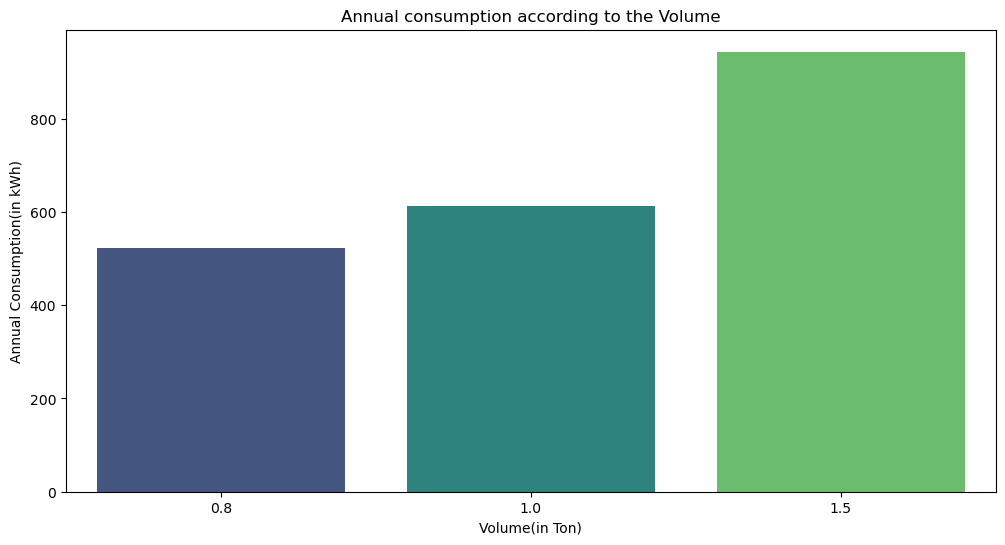

In [1537]:
# annual coms. and  volume
plt.figure(figsize=(12, 6))
sns.barplot(y='Anual_Consumption(in kWh)', x='Volume(in Ton)', data=df1, ci=None, palette='viridis', estimator='mean')
plt.title('Annual consumption according to the Volume')
plt.xlabel('Volume(in Ton)')
plt.ylabel('Annual Consumption(in kWh)')
plt.show()

1) The bar plot illustrates the relationship between the volume (in tons) of air conditioners and their average annual energy consumption (in kilowatt-hours).
2) Air conditioners with higher volumes generally exhibit a higher average annual energy consumption, suggesting that larger units may consume more electricity to cool larger spaces.
3) Understanding the relationship between volume and annual consumption is crucial for optimizing energy usage and minimizing electricity costs associated with air conditioning.

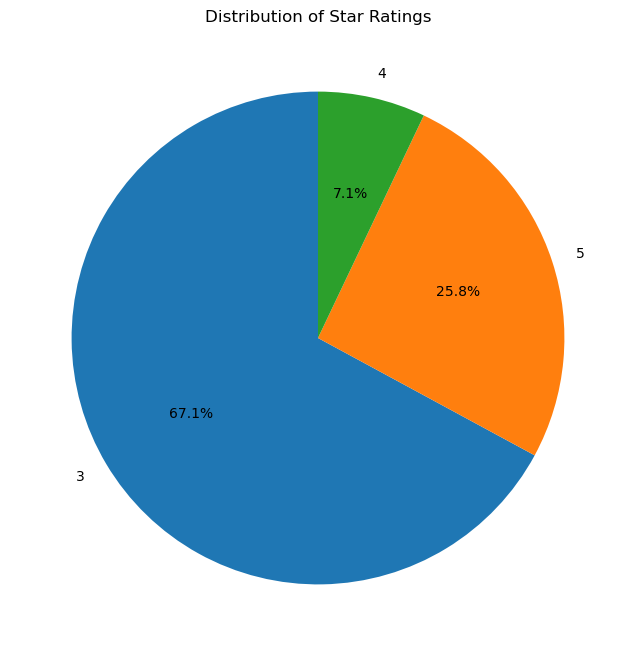

In [1480]:
# Energy rating Distribution
star_rating_counts = df1['Star_Rating'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(star_rating_counts, labels=star_rating_counts.index, autopct='%1.1f%%', startangle=90,)
plt.title('Distribution of Star Ratings')
plt.show()


1) The pie chart provides an overview of the distribution of star ratings among the air conditioners in the dataset.
2) The majority of air conditioners fall within specific star rating categories, as indicated by the dominant segments in the pie chart.
3) Consumers can quickly identify the prevalence of higher or lower star ratings, aiding in the decision-making process when selecting air conditioners based on energy efficiency and performance.

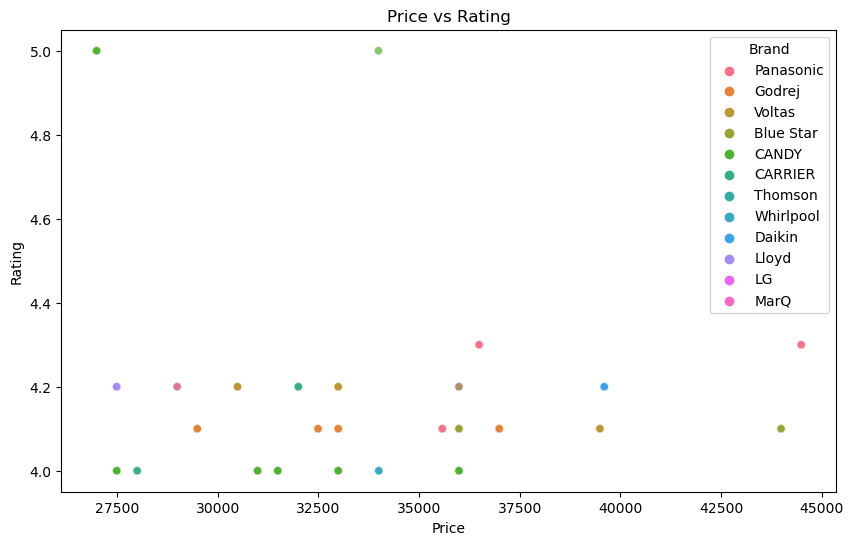

In [1572]:
# rating and prices
color_palate = ['#750E21', '#161A30','#96EFFF', '#3081D0', '#6B240C','#BB9CC0']
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Rating',hue='Brand', data=df1, alpha=0.7)
plt.title('Price vs Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()



1) The scatter plot visually represents the relationship between the 'Price' and 'Rating' for different air conditioner brands.
2) This plot provides a visual indication of whether there is a correlation or tendency for air conditioners with higher prices to have higher ratings


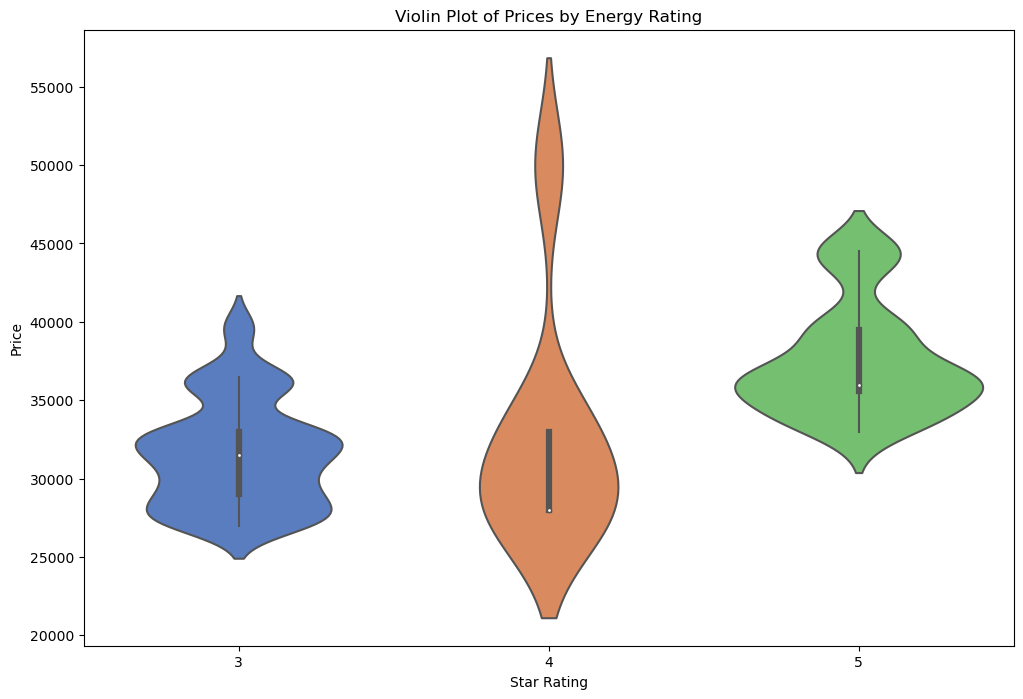

In [1539]:
#Energy Rating and prices
plt.figure(figsize=(12, 8))
sns.violinplot(x='Star_Rating', y='Price', data=df, palette='muted')
plt.title('Violin Plot of Prices by Energy Rating')
plt.xlabel('Star Rating')
plt.ylabel('Price')
plt.show()


1) The violin plot visualizes the distribution of air conditioner prices based on their energy efficiency ratings 
2) Each violin represents a specific Star Rating category, and the width of the violin corresponds to the density of prices within that category.
3) The visualization allows you to identify whether certain Energy Ratings are associated with higher or lower prices on average.

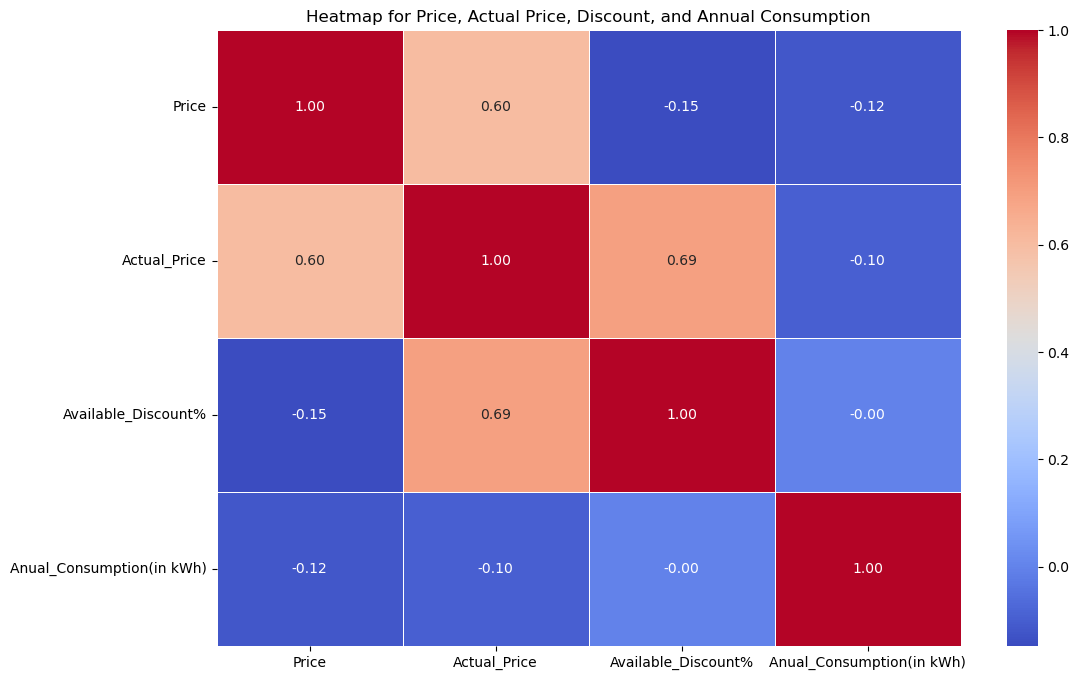

In [1580]:
plt.figure(figsize=(12, 8))
heatmap_data = df1[['Price', 'Actual_Price', 'Available_Discount%', 'Anual_Consumption(in kWh)']]
heatmap_corr = heatmap_data.corr()
sns.heatmap(heatmap_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap for Price, Actual Price, Discount, and Annual Consumption')
plt.show()

1) This visualization helps identify patterns and relationships between numerical features in the dataset.

<Axes: xlabel='Price', ylabel='Anual_Consumption(in kWh)'>

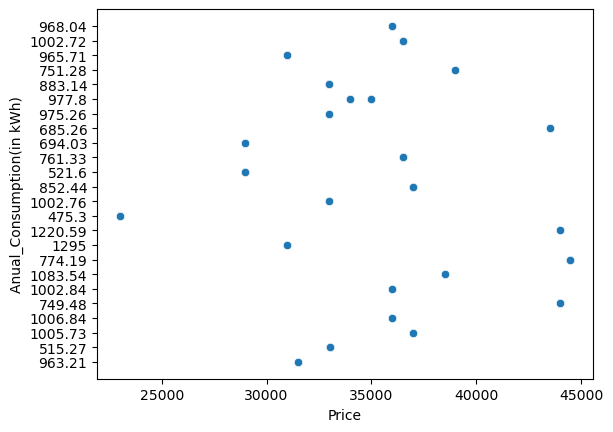

In [39]:
sns.scatterplot(data=df1, x='Price', y='Anual_Consumption(in kWh)')